# Reason for Analysis:

Having invested in stocks for a couple of years, I became interested in transitioning to learning more about other asset classes, namely, real estate.

In particular, I was interested in rental real estate because of its similarity to dividend stocks where you could 1.obtain a fixed annual passive source of income and 2. hope for the asset class to grow in value. 

Furthermore, understanding that the world's population is growing, I felt that real estate was a relatively safe asset class (pending on when you invest). 

Overall, to begin seeing whether real estate is the right choice, I decided that I wanted to overall study 1. the ROI of real estate properties 2. their growth potential and 3. their risk. 

In this part of this exploratory analysis, I showcase the use of a Price/Rent ratio (the apppromixate number of years needed to pay back the initial investment cost) as my pseudo measure of ROI to see which US city shows promise for investing, as well as a Price/Rent ratio scatter plot against the citie0's population, population density, and real estate location quotient to see if there are any unmet, easy to access market (by City). 

Afterwards I focus on NYC to see if there are any local hubs I could be interested in that I could personally go myself to verify the information I glean. I finally end my pre-screening analysis of the NYC market by seeing historical changes in the Price/Rent ratio in promising areas to see if the low Price/Rent ratio is merely an anomaly within a volatile market or not. 

# Part 1: Promising Cities by Price/Rent Ratio

In [1]:
#We begin this section by importing all relevant libraries including pandas, numpy, matplotlib, and pylab.
#We also state that we want our graph to show up in the Jupyter notebook as well as its size and text size; this will make 
#it easier to visualize any graphs we produce

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
font = {'size'   : 18}
matplotlib.rc('font', **font)

In [2]:
#We begin by importig the Price/Rent Data into the notebook and print out the column names to verify that the data has been 
#imported correctly
#Price_to_Rent_City.csv was taken from Zillow's free data and gives us Price/Rent ratios of all the cities of USA, 
#monthly since ~2010

filename = 'Price_Rent_Data/Price_to_Rent_City.csv'
df = pd.read_csv(filename, encoding = 'latin')
titles = list(df)
print(titles)

#We store the last column name of the dataframe so all of our analysis can be done with the most recent Price/Rent data. 
#We do this because our current goal is not to examine how Price/Rent has changed historically (yet), but to see
#how the value changes locally
current_date = titles[len(titles)-1]

['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017

In [11]:
#Because there are over 13,000 cities in USA that are recorded in Zillow's dataset and because we do not particularly care about
#all of them, we take a subset of the data and focus on only the top 50 cities by population. This is defined in the 'SizeRank'
#column
#We continue by cleaning the rest of the data to only keep the zipcode (RegionName), state, and last Price/Rent ratio, and sort
#the dataframe by the Price/Rent ratio (this will allow us to more easily visualize which cities show promise)
df_top50 = df[df['SizeRank'] <= 50]
current_price_per_rent_df = df_top50[['RegionName','State', current_date]]
current_price_per_rent_df = current_price_per_rent_df.sort_values(by = [current_date])

print(current_price_per_rent_df.head())

   RegionName State  2019-01
48  Cleveland    OH     5.89
24    Memphis    TN     8.22
30  Baltimore    MD     8.50
31  Milwaukee    WI     8.89
3     Houston    TX     9.91


In [12]:
#We import another file called Population_Rank.xlsx so we can add the city population, and population density data 
#into our dataframe to see if we can find "attractive" locations.
#i.e. Ideally the goal is to find a city with a low Price/Rent and a high population and population density
#     Such a city would mean that we would have a (ideally) high ROI while it being easy for us to find tenants to rent the 
#     the place we invest in. 

filename2 = 'Price_Rent_Data/Population_Rank.xlsx'
population_rank_df = pd.read_excel(filename2, encoding = 'latin')
#titles2 = list(population_rank_df)
print(population_rank_df.head())

    RegionName       States  Population     Density
1     New York     New York     8622698  10,933/km2
2  Los Angeles   California     3999759   3,276/km2
3      Chicago     Illinois     2716450   4,600/km2
4      Houston        Texas     2312717   1,395/km2
5      Phoenix      Arizona     1626078   1,200/km2


In [13]:
#To make our analysis easier we merge the two dataframes into one. We do this by merging on the RegionName column
#We also resort the dataframe so the smallest Price/Rent ratio remains at the top of the df (this allows us to create\
#a more) visually appeaing graph
city_rank = pd.merge(population_rank_df, current_price_per_rent_df, on = 'RegionName')
city_rank = city_rank.sort_values(by = [current_date])

#Looking at an example of the population_rank_df we also see that the Density is a string and not an integer
#When graphing we want a string, so we have to convert this value into an integer
#We also convert the columns into a list to make the graphing process more simple
#We also normalized our data to make any graph we create visually more enticing

city_rank['Density'] = city_rank['Density'].str[:-4]
city_list = city_rank['RegionName'].tolist()
price_list = city_rank[current_date].tolist()
population_list = city_rank['Population'].tolist()
population_list = population_list/np.max(population_list)
density_list = city_rank['Density'].tolist()
for i in range(len(density_list)):
    density_list[i] = int(density_list[i].replace(',',''))
density_list = density_list/np.max(density_list)
y_pos = range(len(city_list))

Text(0.5,-0.175,'  Price/Rent is <15, it is worth buying the property and when it is above, it is better to rent the property.')

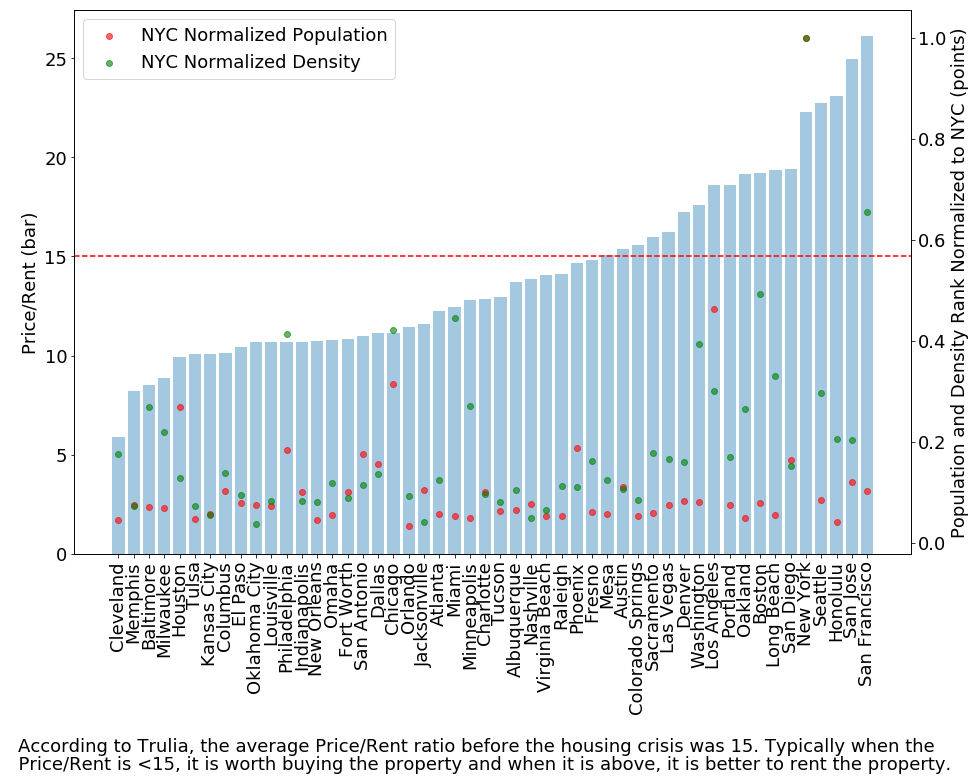

In [14]:
#Plot the Price to Rent Ratio ordered by that value
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.bar(y_pos, price_list, alpha = 0.4, tick_label = city_list)
ax1.tick_params(axis = 'x', which ='major', rotation = 90)
ax1.axhline(y=15, color='r', linestyle='--')
ax1.set_ylabel('Price/Rent (bar)')

#twinx() allows us to graph another plot on the same figure with different y axis length scales
ax2 = ax1.twinx()
ax2.scatter(y_pos, population_list, color = 'r', alpha = 0.6)
ax2.scatter(y_pos, density_list, color = 'g', alpha = 0.6)
ax2.set_ylabel('Population and Density Rank Normalized to NYC (points)')
plt.legend(['NYC Normalized Population','NYC Normalized Density'], loc = 'upper left')

caption1 = "According to Trulia, the average Price/Rent ratio before the housing crisis was 15. Typically when the "
caption2 = "  Price/Rent is <15, it is worth buying the property and when it is above, it is better to rent the property."
fig.text(.5, -0.15, caption1, ha='center')
fig.text(.5, -0.175, caption2, ha='center')

## Summary of the above:
From the above graph, we notice that __Cleveland, Memphis, Baltimore, Milwaukee, Houston, Tulsa,__ as well a handful of other cities look promising in terms of Price/Rent ratio, especially __Cleveland__. However we also notice that their population, as well as population density are not particularly large. This could signify that finding a tenant may be difficult. 

In [15]:
#Because our goal is to see if there any good cities, here we will store the best 10% of cities based off the Price/Rent ratio; 
#this will be useful in later comparison against other factors

candidate_cities1 =  city_list[:int(0.1*len(city_list))]
print('Price/Rent Based Candidate Cities are: ', candidate_cities1)

Price/Rent Based Candidate Cities are:  ['Cleveland', 'Memphis', 'Baltimore', 'Milwaukee', 'Houston']


# Part 2: Promising Cities with a low Price/Rent ratio and high population or population density

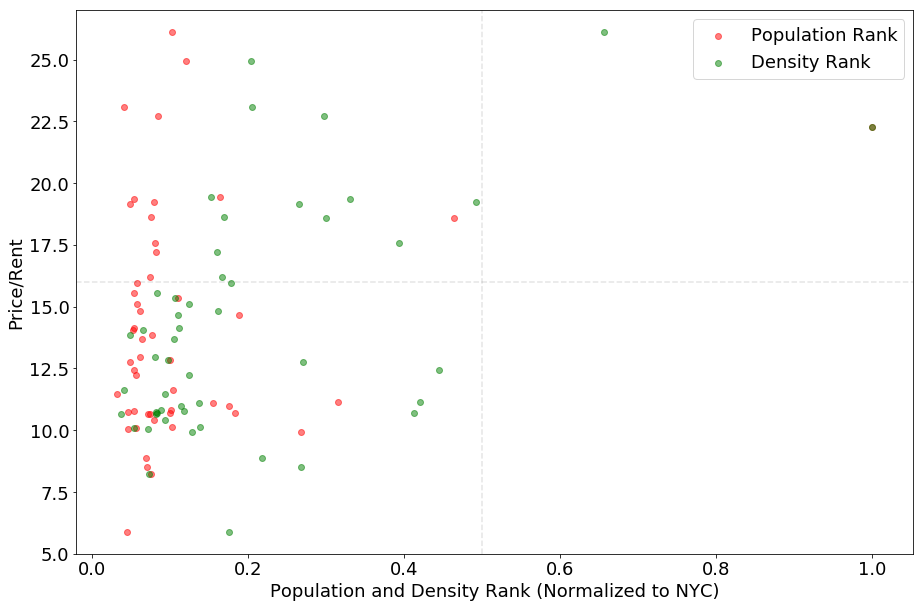

In [16]:
#We see if there are any cities with a low Price/Rent ratio and high population and population density by creating a scatter plot
#and graphically visualizing if there are any candidate cities

plt.figure(2)
plt.scatter(population_list, price_list, alpha = 0.5, color = 'r')
plt.scatter(density_list, price_list, alpha = 0.5, color = 'g')
plt.xlabel('Population and Density Rank (Normalized to NYC)')
plt.ylabel('Price/Rent')
plt.ylim([5,27])
plt.legend(['Population Rank', 'Density Rank'])
plt.axhline(y=(5+27)/2.0, color='k', linestyle='--', alpha = 0.1)
plt.axvline(x=0.5, color='k', linestyle='--', alpha = 0.1)

#### Easily enough from the above analysis, we see that no city matches the criteria of having a low Price/Rent Ratio while having  a high population or population density (bottom right quadrant). This is mainly attributed to the fact that NYC (the value we normalize to) has such a large population as well as population density. This tends to skew the population factor so much. However excluding such a value would be unfair for the analysis because of the general acceptance of how important the city is.

In [17]:
#Because there is no city with a low Price/Rent Ratio as well as high population or population density, the next bext thing to do
#is to see which cities match such requirements the best. 

#The algorithm I have decided to use for this is to see how close (geometric distance wise) the Price/Rent value and population 
#is to a cooridante value of (1,0) wherein the 1 is for how close the cities population is to NYC, and the 0 is for the Price/Rent
#ratio signifying the house is almost free. Of course this coordinate can be varied pending on how important population or 
#Price/Rent ratio is to you. We will do this by creating a dataframe, and also normalizing the Price/Rent Ratio to 15 (the historic average)

price_list2 = price_list/np.float64(15.0)
data_info = {'City': city_list, 'Population': population_list, 'Density': density_list, 'Price_Rent': price_list2}
distance_df = pd.DataFrame(data=data_info)

ideal_coordinates = [1,0]
distance_df['Distance_for_Population'] = np.sqrt((distance_df['Population']-ideal_coordinates[0])**2+(distance_df['Price_Rent']-ideal_coordinates[1])**2)
distance_df['Distance_for_Density'] = np.sqrt((distance_df['Density']-ideal_coordinates[0])**2+(distance_df['Price_Rent']-ideal_coordinates[1])**2)

candidate_cities2_df = distance_df.sort_values(by = ['Distance_for_Population']).head(int(0.1*len(city_list)))
candidate_cities2 = candidate_cities2_df['City'].tolist()

candidate_cities3_df = distance_df.sort_values(by = ['Distance_for_Density']).head(int(0.1*len(city_list)))
candidate_cities3 = candidate_cities3_df['City'].tolist()

print('Population Based Candidate Cities are: ', candidate_cities2)
print('Density Based Candidate Cities are: ', candidate_cities3)


Population Based Candidate Cities are:  ['Houston', 'Chicago', 'Cleveland', 'Memphis', 'Philadelphia']
Density Based Candidate Cities are:  ['Cleveland', 'Philadelphia', 'Baltimore', 'Chicago', 'Milwaukee']


## Summary of the above:
From the above analysis, we notice that __Houston, Chicago, Cleveland, Memphis, and Philadelphia,__ as well a handful of other cities look promising in terms of Price/Rent ratio, Population and Population Density Distance from the ideal case. 
While the above is useful, another factor to consider is how much competition there is from other agencies and real estates if one wanted to start conducting business in these areas. 

# Part 3: Using Location Quotient as a Pseudo Measure of the Real Estate Competitiveness in Different Cities

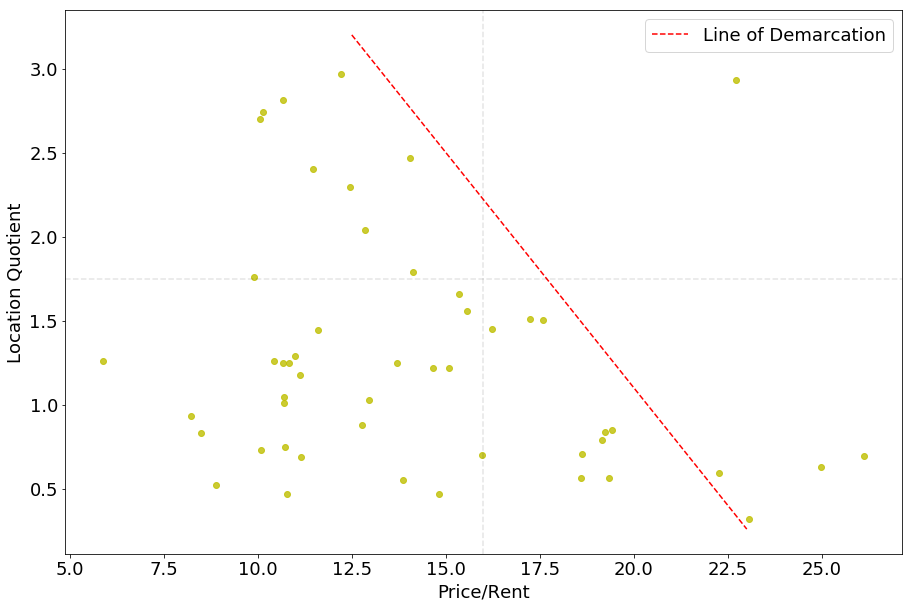

In [18]:
#In Part 1 and part 2 we examined the Price/Rent ratio of various cities plotted along population and population density to see
#if there any untapped markets. 
#Here we examine to see the competitiveness of different markets (Real Estate Location Quotient) alongside the Price/Rent ratio 
#to see if there are any locations that have a low Price/Rent ratio while not being competitive against other real estate agents

#Like always we begin by importing the necessary data and getting rid of any empty values
#Location Quotient data was taken from US Census Bureau

location_quotient_file = 'Price_Rent_Data/location_quotient.xlsx'
location_df = pd.read_excel(location_quotient_file, encoding = 'latin',skiprows = 5)#, skiprows=4) #, encoding = 'ANSI', sep = '\t')
location_titles = list(location_df)
location_df = location_df.dropna(subset = ['Area Name'])


location_quotient_list = [0] * len(city_list)

for p in range(len(location_quotient_list)):
    city_name = city_list[p]
    temp_df = location_df[location_df['Area Name'].str.contains(city_name)]
    location_df_fixed = pd.to_numeric(temp_df['Location Quotient'], errors='coerce')
    location_quotient_list[p] = round(location_df_fixed.mean(),3)

#Demarcation line (for visualization)
predict_x = np.linspace(12.5, 23, 100)
predict_y = [0] * len(predict_x)

for r in range(len(predict_x)):
    predict_y[r] = predict_x[r]*(-0.28) + 6.7
    
plt.figure(3)
plt.scatter(price_list, location_quotient_list, alpha = 0.8, color = 'y')
plt.plot(predict_x, predict_y, '--r')
plt.xlabel('Price/Rent')
plt.ylabel('Location Quotient')
plt.legend(['Line of Demarcation'])
plt.axhline(y=(0+3.5)/2.0, color='k', linestyle='--', alpha = 0.1)
plt.axvline(x=(5+27)/2.0, color='k', linestyle='--', alpha = 0.1)


#### From the above graph two things become apparent. The first is that at a as the Price/Rent ratio increases, the relative competitive landscape of real estate agents decrease. This makes sense because the higher Price/Rent ratio indicates that it would be better for the general population to rent rather than buy; because real estate agents generally make their commisions from the fees of the selling and buying of houses (not renting), it would be undesirable for their to be too many real estate agents in a region where no one should want to buy. We do note, however, that the Price/Rent ratio that really dictates whether people will buy or not is probably closer to 12.5 (extrapolated to the maximum location quotient value), rather than the Trulia suggested 15. The second thing we note is that the desired case of having a low Price/Rent ratio and still a relatively low location quotient exists - there are many cities that are in the bottom left quadrant of the graph! Like we did in Part 2, our next goal is to find the top 10% of candidates which meet the desired criteria. 

In [19]:
#The algorithm we will use for this is to see how close (geometric distance wise) the Price/Rent value and location quotient value 
#is to a cooridante value of (0,0) wherein the the first 0, which represents Price/Rent, we acknowledged previously is 
#better to be 0.The second 0, which represents location quotient or competitiveness, also being closer to 0 or no competition
#is also ideal

data_info_w_location_quotient = {'City': city_list, 'LQ': location_quotient_list, 'Price_Rent': price_list2}
distance_df_w_location_quotient = pd.DataFrame(data=data_info_w_location_quotient)
ideal_coordinates2 = [0,0]
distance_df_w_location_quotient['Distance_for_Location_Quotient'] = np.sqrt((distance_df_w_location_quotient['Price_Rent']-ideal_coordinates2[0])**2+(distance_df_w_location_quotient['LQ']-ideal_coordinates2[1])**2)

candidate_cities4_df = distance_df_w_location_quotient.sort_values(by = ['Distance_for_Location_Quotient']).head(int(0.1*len(city_list)))
candidate_cities4 = candidate_cities4_df['City'].tolist()

print('Location Quotient Based Candidate Cities are: ', candidate_cities4)


Location Quotient Based Candidate Cities are:  ['Milwaukee', 'Omaha', 'Kansas City', 'Baltimore', 'Chicago']


## Summary of the above:
From the above analysis, we notice that __Milwaukee, Omaha, Kansas City, Baltimore, and Chicago,__ look promising in terms of Price/Rent ratio and location quotient perspective.  


# Part 4: Comparing Candidate Cities

In [20]:
#We take all the candidate cities from above and only take the unique sets
#We also include NYC because I live here and because its NYC
candidate_cities = set().union(candidate_cities1, candidate_cities2, candidate_cities3, candidate_cities4, ['New York'])
print(candidate_cities)

{'Memphis', 'Houston', 'Kansas City', 'Philadelphia', 'Cleveland', 'New York', 'Milwaukee', 'Baltimore', 'Chicago', 'Omaha'}


In [22]:
#Merge the dataframes from the population, population density, and location quotient; before doing this, we drop a 'Price_Rent'
#column in one of the dataframes to avoid duplicate column titles
#We also normalize the location quotient and Price/Rent

distance_df = distance_df.drop(['Price_Rent'], axis=1)
master_df = pd.merge(distance_df, distance_df_w_location_quotient, on = 'City')

master_df['LQ'] = master_df['LQ']/master_df['LQ'].max()
master_df['Price_Rent'] = master_df['Price_Rent']/master_df['Price_Rent'].max()

print(master_df.head())

        City   Density  Population  Distance_for_Population  \
0  Cleveland  0.175341    0.044710                 1.032843   
1    Memphis  0.072624    0.075642                 1.074589   
2  Baltimore  0.268362    0.070935                 1.088243   
3  Milwaukee  0.218421    0.069045                 1.103599   
4    Houston  0.127595    0.268213                 0.985897   

   Distance_for_Density        LQ  Price_Rent  Distance_for_Location_Quotient  
0              0.913373  0.424242    0.225584                        1.319768  
1              1.077186  0.313131    0.314822                        1.079446  
2              0.925422  0.279461    0.325546                        1.004993  
3              0.980877  0.175084    0.340483                        0.788450  
4              1.094336  0.592593    0.379548                        1.879915  


In [23]:
#Keep only the candidate cities
#We are going to create a bar graph of this where the taller the bar the more we "like" a city
#The above statement makes sense for population and population density but not for Location Quotient and Price/Rent
#To account for this we substract the Location Quotient and Price/Rent value from 1

master_df = master_df[master_df['City'].isin(candidate_cities)]
master_df['1-LQ'] = 1 - master_df['LQ']
master_df['1-Price_Rent'] = 1 - master_df['Price_Rent']
print(master_df)

            City   Density  Population  Distance_for_Population  \
0      Cleveland  0.175341    0.044710                 1.032843   
1        Memphis  0.072624    0.075642                 1.074589   
2      Baltimore  0.268362    0.070935                 1.088243   
3      Milwaukee  0.218421    0.069045                 1.103599   
4        Houston  0.127595    0.268213                 0.985897   
6    Kansas City  0.053965    0.056704                 1.158571   
11  Philadelphia  0.412604    0.183337                 1.083896   
14         Omaha  0.118540    0.054147                 1.187502   
18       Chicago  0.420745    0.315035                 1.010312   
45      New York  1.000000    1.000000                 1.484667   

    Distance_for_Density        LQ  Price_Rent  \
0               0.913373  0.424242    0.225584   
1               1.077186  0.313131    0.314822   
2               0.925422  0.279461    0.325546   
3               0.980877  0.175084    0.340483   
4           

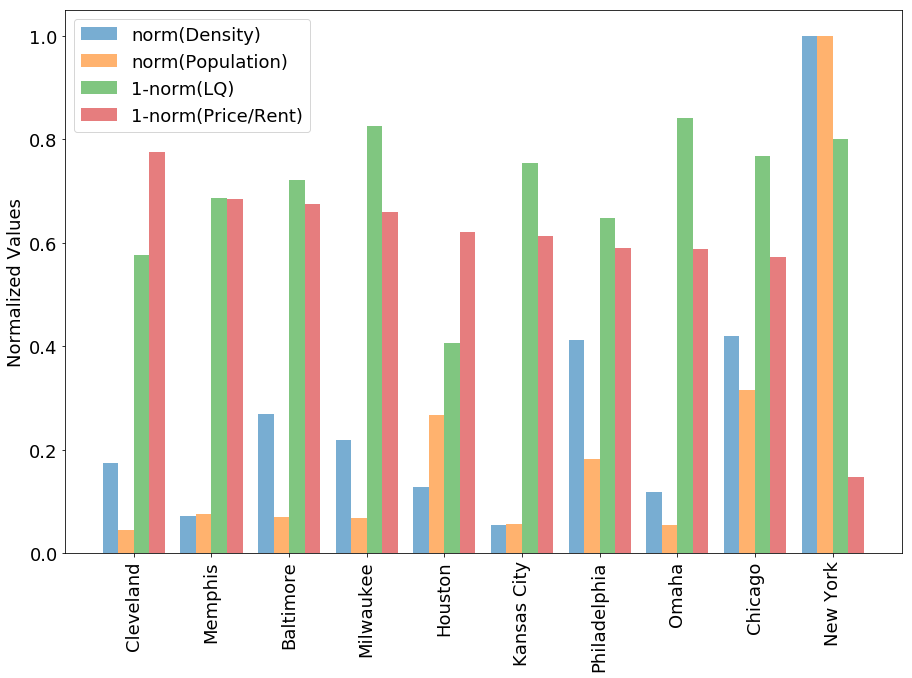

In [24]:
#Bar plot the above data

master_city = master_df['City'].tolist()
master_density = master_df['Density'].tolist()
master_population = master_df['Population'].tolist()
master_LQ = master_df['1-LQ'].tolist()
master_Price_Rent = master_df['1-Price_Rent'].tolist()

y_pos = range(len(master_city))
width = np.min(np.diff(y_pos))/5.0
alpha_val = 0.6

plt.figure(4)
plt.bar(y_pos-1.5*width, master_density, width, alpha = alpha_val)
plt.bar(y_pos-0.5*width, master_population, width, alpha = alpha_val)
plt.bar(y_pos+0.5*width, master_LQ, width, alpha = alpha_val)
plt.bar(y_pos+1.5*width, master_Price_Rent, width, alpha = alpha_val)
plt.xticks(y_pos, master_city, rotation=90)
plt.ylabel('Normalized Values')
legends = ['norm(Density)','norm(Population)','1-norm(LQ)', '1-norm(Price/Rent)']
plt.legend(legends)

## Summary of the above:
The above shows how each of the candidate cities compare to each other and further analysis can be done by taking a linear combination of each of the variables - giving weight to each variable pending on how much it personally matters to you. 
Doing so should allow one to come up with their personal algorithm for deciding which city to begin their investment process. 

Of course further analysis can be done by taking into account rules and regulations for each state (the time it takes for a brokerage firm and the government to approve the real estate buying and selling process) into the equation to create a more robust algorithm. Another option is to look at length of time a "rent" is on for Zillow, as well as the average price of houses in the area. While the average price of homes should not matter for large corporations, it may be for individuals aiming to become landlords. 

# Part 5: City Ranking Algorithm based on Preferential City Qualities

In [122]:
#In part 4 we created a bar graph comparing different candidate cities to qualitatively see which City would be most attractive 
#to begin investing in. 
#In this section, we create a simple ranking algorithm to quantitatively choose which City to invest in as a landlord

#This will be done by choosing a ranking priority of population, population density, location quotient, and Price_Rent and creating
#a weight function telling us that we care about a particular variable a certain amount
#We then do a mutliply each city parameter by the weight and sum up the values to give us a city "value" and rank the cities in that 
#manner

#For the purpose of this analysis, I chose the following ranking
#1. Price/Rent 2. Population 3. Population Density 4. Location Quotient

variable_rank = ['1-Price_Rent', 'Population', 'Density', '1-LQ']
master_df['Rank_Value'] = 0

for s in range(len(variable_rank)):
    #The weight of each variable is the inverse in the order it came from
    #The weight can be tuned to each individuals preference
    master_df['Rank_Value'] = master_df['Rank_Value'] + master_df[variable_rank[s]] * (1.0/float(s+1.0))

rank_list = master_df[['City', 'Rank_Value']].sort_values(by = 'Rank_Value', ascending = False)
rank_list = rank_list.reset_index(drop=True)
print(rank_list)

           City  Rank_Value
0      New York    1.180319
1       Chicago    1.063028
2     Cleveland    0.999157
3  Philadelphia    0.981819
4     Baltimore    0.979510
5     Milwaukee    0.973076
6       Memphis    0.918924
7       Houston    0.898942
8         Omaha    0.864539
9   Kansas City    0.848451


# Extra Analysis on NYC
I decided to do a little more analysis of NYC because I currently live here and want to know if there are any promising regions I could think of potentially investing in. For this I simply create a geographic color map of the region to see 1) if the Price/Rent ratio ever reaches a favorable level and 2) to see how it may be geographically dependant. Afterwards, I look at the historical change in the Price/Rent ratio of a few candidate neighborhoods to see how time affects the value.

In [96]:
#To begin this section, we import the Price/Rent data on the zipcode level

zipcode_file = 'Price_Rent_Data/Price_to_Rent_Zipcode.csv'
zipcode_df = pd.read_csv(zipcode_file, encoding = 'latin', low_memory = False)
zipcode_titles = list(zipcode_df)
current_date = zipcode_titles[len(zipcode_titles)-1]

In [97]:
#Only focus on the zipcodes in New York
zipcode_df = zipcode_df[zipcode_df['City'] == 'New York']
current_price_per_rent_zip_df = zipcode_df[['RegionName','State', current_date]]
current_price_per_rent_zip_df = current_price_per_rent_zip_df.sort_values(by = [current_date])

city_list = current_price_per_rent_zip_df['RegionName'].tolist()
price_list = current_price_per_rent_zip_df[current_date].tolist()

d = {'Zipcode': city_list, 'Price': price_list}

price_rent_df = pd.DataFrame(data = d)
price_rent_df['Zipcode'] = price_rent_df['Zipcode'].astype(str)

In [99]:
#Begin creating the map
#First change the directory
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib as mpl
from matplotlib.colors import rgb2hex
import os

us_shape_file_dir = "cb_2017_us_zcta510_500k"
os.chdir(us_shape_file_dir)

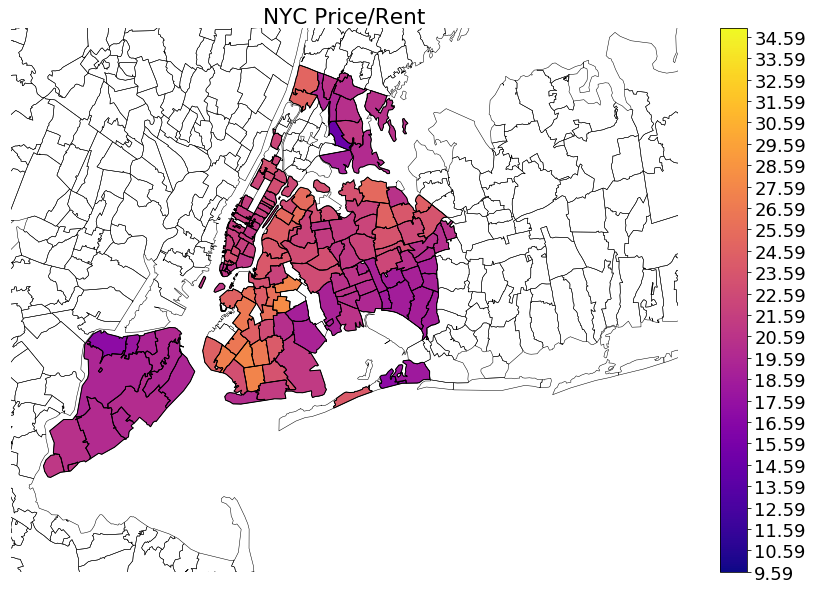

In [102]:
# NYC Coordinates
# Method was taken from James D. Triveri (http://www.jtrive.com/visualizing-population-density-by-zip-code-with-basemap.html) 
# Basemap tutorial and edited to match my data
colormap = plt.cm.plasma

lowerlon = -74.3 
upperlon = -73.4
lowerlat = 40.4
upperlat = 40.95

m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    resolution='c',
    projection='lcc',
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )

shp_info = m.readshapefile(
    os.path.basename(us_shape_file_dir),'states',drawbounds=True
    )

price_rent = {
    str(i): j for (i, j) in zip(price_rent_df['Zipcode'].values,price_rent_df['Price'].values)
    }

# Choose a color for each state based on population density. Range
# vmin-vmax was taken as the limits of the Price/Rent ratio 
ziplist = []
colors  = {}
vmin    = np.min(price_list)
vmax    = np.max(price_list)

# Filter m.states_info to only NYC zipcodes.
zip_info   = m.states_info
popdiv     = (max(price_rent.values())/(vmax-vmin))
popdensscl = {i:(j/popdiv) for (i,j) in price_rent.items()}

for d in zip_info:
    iterzip = d["ZCTA5CE10"]
    if iterzip in popdensscl.keys():
        iterpop = popdensscl.get(iterzip,0)
        colors[iterzip] = colormap(iterpop/vmax)[:3]
    ziplist.append(iterzip)


for nshape,seg in enumerate(m.states):
    i, j = zip(*seg)
    if ziplist[nshape] in popdensscl.keys():
        color = rgb2hex(colors[ziplist[nshape]])
        edgecolor = "#000000"
        plt.fill(i,j,color,edgecolor=edgecolor);

# (Optional) include colorbar.
sm = plt.cm.ScalarMappable(
    cmap=colormap,norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    )

mm = plt.cm.ScalarMappable(cmap=colormap)
mm.set_array([vmin, vmax])
plt.colorbar(mm,ticks=np.arange(vmin, vmax+1, 1),orientation="vertical")
plt.title("NYC Price/Rent")
plt.gca().axis("off")
plt.show()

Text(0.5,1,'Historic changes in Price/Rent in the top 6 zipcodes of NYC')

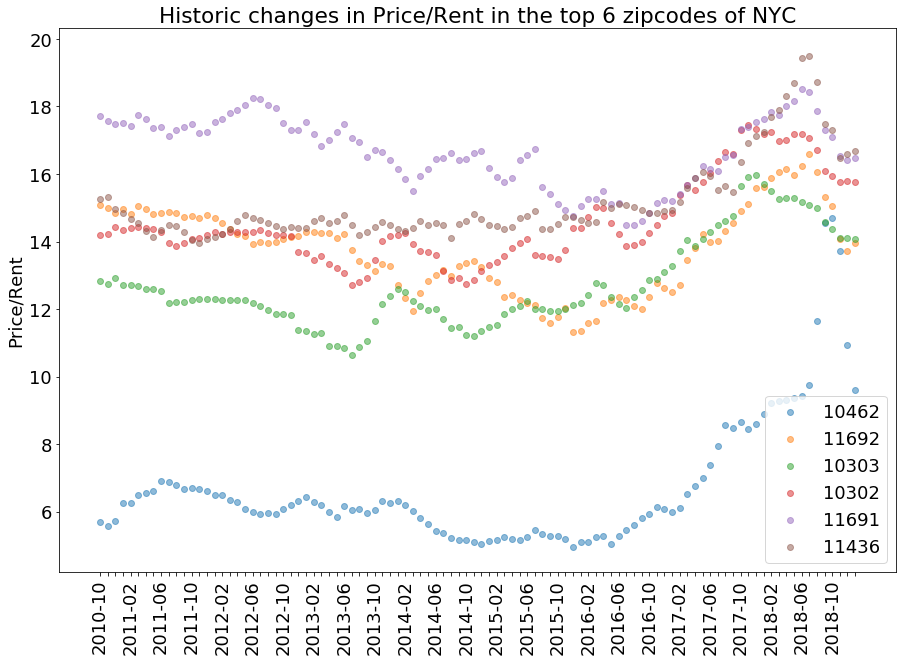

In [108]:
# After looking at the map, we realize that there are some locations that seem promising. To see whether the data is an anomaly,
# we graph the Price/Rent historic change of the top 6 zipcodes with the lowest Price/Rent

zipcodes = city_list[:6]
y_pos = range(len(city_list))

plt.figure(5)
for l in range(len(zipcodes)):
    df2 = zipcode_df[zipcode_df['RegionName'] == zipcodes[l]]
    df2_clean = df2.drop(df2.iloc[:, 0:7], axis=1)
    y_pos2 = range(len(df2_clean.T))
    dates_list = zipcode_titles[7:]

    for k in range(len(dates_list)):
        if k%4 != 0:
            dates_list[k] = ''

    plt.scatter(y_pos2, df2_clean.T, alpha = 0.5)
    plt.xticks(y_pos2, dates_list, rotation = 90)
plt.ylabel('Price/Rent')
plt.legend(zipcodes)
plt.title('Historic changes in Price/Rent in the top 6 zipcodes of NYC')

#### We realize that historically the Price/Rent ratio of the top 6 locations remained relatively low and they are not an anomaly; this is good. We do however, also, note that since 2017 that the ratio has been gradually increasing and that we have to be cautious.